#### Pyramid, or pyramid represenation is a type of multi-scale signal representation in which a signal or an image  is subject to repeated smoothing and subsampling.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('lena_copy.png')

In [3]:
lr1 = cv2.pyrDown(img)
lr2 = cv2.pyrDown(lr1)
hr1 = cv2.pyrUp(lr2)

In [4]:
# cv2.imshow('Original Image', img)
# cv2.imshow('PyrDown 1 Image', lr1)
cv2.imshow('PyrDown 2 Image', lr2)
cv2.imshow('PyrUp 1 Image', hr1)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

### Alternative approach to using pyrDown and pyrUp repeatedly

In [5]:
layer = img.copy()

In [6]:
gp = [layer]

In [8]:
for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    cv2.imshow(str(i), gp[i])
if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()

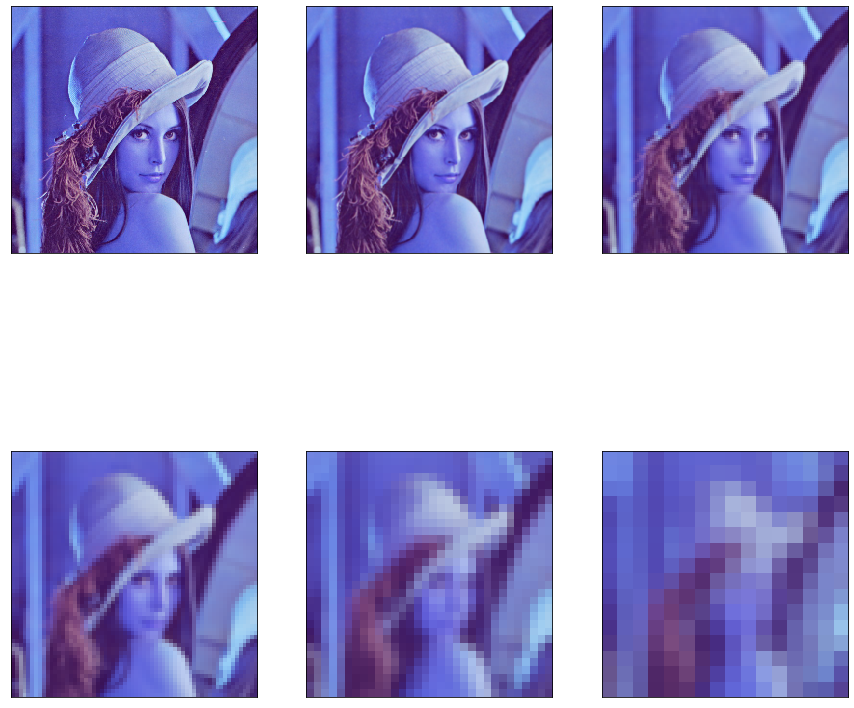

In [9]:
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(gp[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

#### A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid.

In [10]:
layer = gp[6]

In [11]:
cv2.imshow("Upper Level Gaussain Pyramid", layer)
lp = [layer]

for i in range(5,0,-1):
    gaussian_extended = cv2.pyrUp(gp[i])
    laplacian = cv2.subtract(gp[i-1],gaussian_extended)
    cv2.imshow(str(i), laplacian)

if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()